In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


In [5]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

1390

In [8]:
roses = list(data_dir.glob('roses/*'))

In [9]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

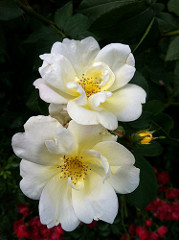

In [10]:
PIL.Image.open(str(roses[0]))

In [11]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [12]:
flowers_label = {
    'roses' : 1,
    'sunflowers':2,
    'tulips':3
}

In [13]:
img = cv2.imread(flower_images_dict['roses'][0])

In [14]:
img.shape

(240, 179, 3)

In [15]:
# dimension saare images ka same karte hua

cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [16]:
X,Y = [] ,[]

for flower_name , images in flower_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, (180,180))
        X.append(resize_img)
        Y.append(flowers_label[flower_name])

In [17]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [18]:
X = np.array(X)
y = np.array(Y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)

In [20]:
len(X_train)

1042

In [21]:
len(X_test)

348

In [22]:
# scaling
X_train = X_train / 255
X_test = X_test/255

In [23]:
Y_train = np.array(Y_train)

In [24]:
num_classes =5

model = Sequential ([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs=30) 

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 500ms/step - accuracy: 0.5154 - loss: 1.2590
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 497ms/step - accuracy: 0.8412 - loss: 0.4639
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 504ms/step - accuracy: 0.8639 - loss: 0.4075
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 504ms/step - accuracy: 0.9114 - loss: 0.2727
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 503ms/step - accuracy: 0.8967 - loss: 0.2715
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 500ms/step - accuracy: 0.9246 - loss: 0.2181
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 498ms/step - accuracy: 0.9718 - loss: 0.1063
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 497ms/step - accuracy: 0.9779 - loss: 0.0607
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 499ms/step - accuracy: 0.9899 - loss: 0.0444
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 475ms/step - accuracy: 0.9811 - loss: 0.0585
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 474ms/step - accuracy: 0.9870 - loss: 0.0409
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 16

In [52]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [54]:
model.evaluate(X_test,Y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.9162 - loss: 0.6626


[0.6089953184127808, 0.9109195470809937]

In [58]:
predictions = model.predict(X_test)
predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step


array([[-16.678709 ,   1.2193474,  17.300817 ,   7.5554013, -12.820787 ],
       [-27.86286  ,  27.00243  ,  17.582544 ,   4.9626956, -30.146307 ],
       [-32.29624  ,  17.381914 ,  35.111748 ,   7.5877643, -30.035383 ],
       ...,
       [-27.543077 ,  16.352446 ,  34.24023  ,  -3.299363 , -24.295988 ],
       [-27.280422 ,  20.671425 ,  11.628598 ,  19.927711 , -29.69074  ],
       [-35.360783 ,   6.9021544,  33.979176 ,  18.733955 , -27.39661  ]],
      dtype=float32)

In [60]:
score = tf.nn.softmax(predictions[0])

In [62]:
np.argmax(score)

2

In [66]:
Y_test[0]

2

# Improve accuracy using data augmentattion

In [76]:
from tensorflow.keras import layers
from tensorflow import keras

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


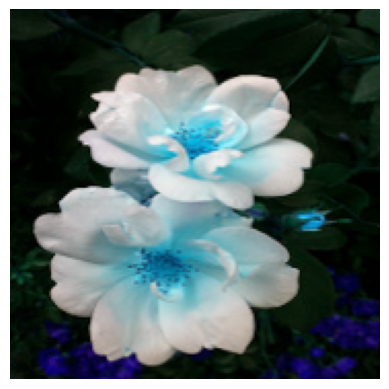

In [78]:
plt.axis('off')
plt.imshow(X[0])

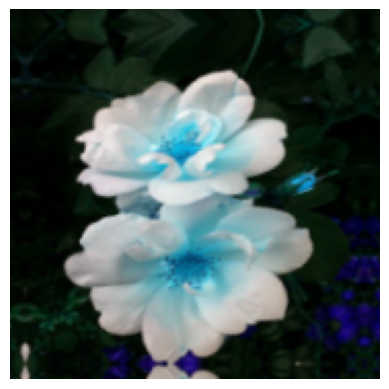

In [80]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [82]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, Y_train, epochs=30)  

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 622ms/step - accuracy: 0.5415 - loss: 1.3483
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 616ms/step - accuracy: 0.8152 - loss: 0.4960
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 627ms/step - accuracy: 0.8078 - loss: 0.4627
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 685ms/step - accuracy: 0.8756 - loss: 0.3668
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 635ms/step - accuracy: 0.8688 - loss: 0.3688
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 660ms/step - accuracy: 0.8874 - loss: 0.3390
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 622ms/step - accuracy: 0.8878 - loss: 0.3410
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 622ms/step - accuracy: 0.8759 - loss: 0.3509
Epoch 9/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 624ms/step - accuracy: 0.8961 - loss: 0.3151
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 652ms/step - accuracy: 0.8895 - loss: 0.3105
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 658ms/step - accuracy: 0.8932 - loss: 0.2795
Epoch 12/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 22

In [86]:
model.evaluate(X_test,Y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.9347 - loss: 0.2571


[0.2777354419231415, 0.9166666865348816]